# Импорт библиотек

In [9]:
from moexalgo import Market, Ticker

# Загрузка данных

In [150]:
def get_history(ticker, date):
    loader = Ticker(ticker)
    one_day_df = loader.tradestats(date=date, till_date=date)
    if one_day_df.shape[0] > 0:
        print(one_day_df.shape)
        one_day_df.to_pickle(f"../data/raw/{date.replace('-','')}_{ticker}.pkl")
    else:
        print('Данных нет')

## История

In [151]:
from datetime import date, timedelta
import time

ticker='YNDX'

start_date = date(2023, 1, 1)
end_date = date(2023, 12, 1)

while start_date <= end_date:
    date = start_date.strftime("%Y-%m-%d")
    print(date)
    get_history(ticker, date)
    start_date += timedelta(days=1)
    time.sleep(3)

2023-01-01


NameError: name 'Ticker' is not defined

## Ежедневные загрузки

In [10]:
from datetime import datetime, timedelta

yesterday = datetime.today() - timedelta(days=1)
yesterday = yesterday.strftime('%Y-%m-%d')
print(yesterday)

ticker='YNDX'
get_history(ticker, yesterday)

Данных нет


In [12]:
loader = Ticker('YNDX')
one_day_df = loader.tradestats(date='2023-12-04', till_date='2023-12-04')
one_day_df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,trades_b,trades_s,val_b,val_s,vol_b,vol_s,disb,pr_vwap_b,pr_vwap_s,systime
0,YNDX,2023-12-04,10:05:00,2420.0,2424.8,2385.0,2393.4,0.0007,64989,155802690.0,...,1635,1440,85092829.0,70709861.0,35499,29490,0.09,2397.0,2397.8,2023-12-04 10:05:10
1,YNDX,2023-12-04,10:10:00,2392.4,2398.8,2381.0,2386.4,0.0003,21897,52308937.0,...,549,589,29422650.0,22886286.0,12315,9582,0.12,2389.2,2388.5,2023-12-04 10:10:10
2,YNDX,2023-12-04,10:15:00,2386.8,2389.0,2365.6,2375.6,0.0004,81050,192477490.0,...,1181,1146,97212745.0,95264744.0,40942,40108,0.01,2374.4,2375.2,2023-12-04 10:15:10
3,YNDX,2023-12-04,10:20:00,2377.6,2392.6,2370.2,2388.0,0.0004,24505,58371349.0,...,527,573,30207302.0,28164047.0,12680,11825,0.03,2382.3,2381.7,2023-12-04 10:20:10
4,YNDX,2023-12-04,10:25:00,2393.2,2395.2,2382.0,2385.6,0.0005,40664,97077128.0,...,541,560,49171695.0,47905433.0,20599,20065,0.01,2387.1,2387.5,2023-12-04 10:25:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,YNDX,2023-12-04,18:20:00,2406.0,2408.0,2405.8,2406.2,0.0001,2163,5204213.0,...,45,71,2189474.0,3014738.0,910,1253,-0.16,2406.0,2406.0,2023-12-04 18:20:10
100,YNDX,2023-12-04,18:25:00,2406.0,2406.4,2405.8,2405.8,0.0001,779,1874277.0,...,35,28,690525.0,1183752.0,287,492,-0.26,2406.0,2406.0,2023-12-04 18:30:10
101,YNDX,2023-12-04,18:30:00,2405.8,2406.0,2402.2,2402.6,0.0001,1659,3990490.0,...,69,80,1079843.0,2910647.0,449,1210,-0.46,2405.0,2405.5,2023-12-04 18:30:10
102,YNDX,2023-12-04,18:35:00,2402.6,2403.6,2395.0,2396.2,0.0002,5068,12156029.0,...,123,182,4653729.0,7502300.0,1940,3128,-0.23,2398.8,2398.4,2023-12-04 18:35:10


# Препроцессинг

In [249]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta

import pandas as pd
import glob
import os

In [250]:
all_files = glob.glob("../data/raw/*.pkl")

df = []
for filename in all_files:
    tdf = pd.read_pickle(filename)
    df.append(tdf)

df = pd.concat(df, axis=0, ignore_index=True)
df['pr_mean'] = df[['pr_high','pr_low']].mean(axis=1)

df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,trades_s,val_b,val_s,vol_b,vol_s,disb,pr_vwap_b,pr_vwap_s,systime,pr_mean
0,YNDX,2023-01-03,10:05:00,1817.2,1830.0,1817.0,1822.4,0.0005,3586,6543004.0,...,63,4477160.0,2065844.0,2453,1133,0.37,1825.2,1823.3,2023-10-27 00:31:40,1823.5
1,YNDX,2023-01-03,10:10:00,1824.0,1830.0,1822.6,1824.8,0.0003,2426,4434429.0,...,47,2505360.0,1929068.0,1370,1056,0.13,1828.7,1826.8,2023-10-27 00:31:41,1826.3
2,YNDX,2023-01-03,10:15:00,1825.0,1826.8,1822.6,1826.8,0.0003,548,999672.0,...,27,695113.0,304559.0,381,167,0.39,1824.4,1823.7,2023-10-27 00:31:42,1824.7
3,YNDX,2023-01-03,10:20:00,1825.6,1833.6,1825.6,1829.4,0.0002,2585,4730644.0,...,77,2872988.0,1857655.0,1570,1015,0.21,1829.9,1830.2,2023-10-27 00:31:43,1829.6
4,YNDX,2023-01-03,10:25:00,1827.8,1829.0,1811.2,1816.6,0.0003,11584,21070462.0,...,308,4913530.0,16156931.0,2699,8885,-0.53,1820.5,1818.5,2023-10-27 00:31:43,1820.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24121,YNDX,2023-12-01,18:20:00,2441.2,2448.4,2437.2,2440.8,0.0003,16780,40974754.0,...,326,20593316.0,20381438.0,8433,8347,0.01,2442.0,2441.8,2023-12-01 18:20:10,2442.8
24122,YNDX,2023-12-01,18:25:00,2441.2,2448.0,2435.2,2435.4,0.0004,32395,79114293.0,...,413,40138964.0,38975328.0,16437,15958,0.01,2442.0,2442.4,2023-12-01 18:25:10,2441.6
24123,YNDX,2023-12-01,18:30:00,2435.4,2439.4,2427.0,2431.6,0.0003,28797,70058852.0,...,668,33627778.0,36431074.0,13823,14974,-0.04,2432.7,2433.0,2023-12-01 18:30:10,2433.2
24124,YNDX,2023-12-01,18:35:00,2431.6,2435.0,2422.2,2428.2,0.0004,38289,92961344.0,...,604,48653638.0,44307706.0,20042,18247,0.05,2427.6,2428.2,2023-12-01 18:35:10,2428.6


## Фичи

### Отношение к последнему часу

In [251]:
for i in range(1,11+1):
    df[f'ratio_pr_mean_{i}'] = df['pr_mean'] / df['pr_mean'].shift(i)
    
df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,ratio_pr_mean_2,ratio_pr_mean_3,ratio_pr_mean_4,ratio_pr_mean_5,ratio_pr_mean_6,ratio_pr_mean_7,ratio_pr_mean_8,ratio_pr_mean_9,ratio_pr_mean_10,ratio_pr_mean_11
0,YNDX,2023-01-03,10:05:00,1817.2,1830.0,1817.0,1822.4,0.0005,3586,6543004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YNDX,2023-01-03,10:10:00,1824.0,1830.0,1822.6,1824.8,0.0003,2426,4434429.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YNDX,2023-01-03,10:15:00,1825.0,1826.8,1822.6,1826.8,0.0003,548,999672.0,...,1.000658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YNDX,2023-01-03,10:20:00,1825.6,1833.6,1825.6,1829.4,0.0002,2585,4730644.0,...,1.001807,1.003345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YNDX,2023-01-03,10:25:00,1827.8,1829.0,1811.2,1816.6,0.0003,11584,21070462.0,...,0.997479,0.996605,0.998135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24121,YNDX,2023-12-01,18:20:00,2441.2,2448.4,2437.2,2440.8,0.0003,16780,40974754.0,...,0.997631,0.997061,0.995193,0.995355,0.995274,0.994140,0.994909,0.995964,0.997061,0.995558
24122,YNDX,2023-12-01,18:25:00,2441.2,2448.0,2435.2,2435.4,0.0004,32395,79114293.0,...,0.999959,0.997141,0.996571,0.994704,0.994866,0.994785,0.993651,0.994420,0.995474,0.996571
24123,YNDX,2023-12-01,18:30:00,2435.4,2439.4,2427.0,2431.6,0.0003,28797,70058852.0,...,0.996070,0.996519,0.993711,0.993143,0.991282,0.991443,0.991362,0.990233,0.990999,0.992050
24124,YNDX,2023-12-01,18:35:00,2431.6,2435.0,2422.2,2428.2,0.0004,38289,92961344.0,...,0.994676,0.994187,0.994635,0.991832,0.991265,0.989408,0.989569,0.989488,0.988361,0.989126


### Прошлый час

In [252]:
for a in ['min','max','mean','std']:
    df[f'hour_{a}'] = df.groupby('tradedate')['pr_mean'].transform(lambda s: s.shift(1).rolling(11).agg(a))
    
df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,ratio_pr_mean_6,ratio_pr_mean_7,ratio_pr_mean_8,ratio_pr_mean_9,ratio_pr_mean_10,ratio_pr_mean_11,hour_min,hour_max,hour_mean,hour_std
0,YNDX,2023-01-03,10:05:00,1817.2,1830.0,1817.0,1822.4,0.0005,3586,6543004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YNDX,2023-01-03,10:10:00,1824.0,1830.0,1822.6,1824.8,0.0003,2426,4434429.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YNDX,2023-01-03,10:15:00,1825.0,1826.8,1822.6,1826.8,0.0003,548,999672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YNDX,2023-01-03,10:20:00,1825.6,1833.6,1825.6,1829.4,0.0002,2585,4730644.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YNDX,2023-01-03,10:25:00,1827.8,1829.0,1811.2,1816.6,0.0003,11584,21070462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24121,YNDX,2023-12-01,18:20:00,2441.2,2448.4,2437.2,2440.8,0.0003,16780,40974754.0,...,0.995274,0.994140,0.994909,0.995964,0.997061,0.995558,2441.7,2457.2,2452.036364,4.293081
24122,YNDX,2023-12-01,18:25:00,2441.2,2448.0,2435.2,2435.4,0.0004,32395,79114293.0,...,0.994866,0.994785,0.993651,0.994420,0.995474,0.996571,2441.7,2457.2,2451.045455,5.060111
24123,YNDX,2023-12-01,18:30:00,2435.4,2439.4,2427.0,2431.6,0.0003,28797,70058852.0,...,0.991282,0.991443,0.991362,0.990233,0.990999,0.992050,2441.6,2457.2,2450.281818,5.811681
24124,YNDX,2023-12-01,18:35:00,2431.6,2435.0,2422.2,2428.2,0.0004,38289,92961344.0,...,0.991265,0.989408,0.989569,0.989488,0.988361,0.989126,2433.2,2457.2,2448.509091,7.675475


### Прошлый день

In [253]:
agg_temp = df.groupby('tradedate')['pr_mean'].agg(['min','max','mean','std'])
agg_temp.columns = [f'ytd_{col}' for col in agg_temp.columns]
agg_temp = agg_temp.reset_index()
agg_temp['tradedate'] = agg_temp['tradedate'] + timedelta(days=1)

df = df.merge(agg_temp, on='tradedate', how='left')
df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,ratio_pr_mean_10,ratio_pr_mean_11,hour_min,hour_max,hour_mean,hour_std,ytd_min,ytd_max,ytd_mean,ytd_std
0,YNDX,2023-01-03,10:05:00,1817.2,1830.0,1817.0,1822.4,0.0005,3586,6543004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YNDX,2023-01-03,10:10:00,1824.0,1830.0,1822.6,1824.8,0.0003,2426,4434429.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YNDX,2023-01-03,10:15:00,1825.0,1826.8,1822.6,1826.8,0.0003,548,999672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YNDX,2023-01-03,10:20:00,1825.6,1833.6,1825.6,1829.4,0.0002,2585,4730644.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YNDX,2023-01-03,10:25:00,1827.8,1829.0,1811.2,1816.6,0.0003,11584,21070462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24121,YNDX,2023-12-01,18:20:00,2441.2,2448.4,2437.2,2440.8,0.0003,16780,40974754.0,...,0.997061,0.995558,2441.7,2457.2,2452.036364,4.293081,2545.9,2599.5,2571.979808,14.445178
24122,YNDX,2023-12-01,18:25:00,2441.2,2448.0,2435.2,2435.4,0.0004,32395,79114293.0,...,0.995474,0.996571,2441.7,2457.2,2451.045455,5.060111,2545.9,2599.5,2571.979808,14.445178
24123,YNDX,2023-12-01,18:30:00,2435.4,2439.4,2427.0,2431.6,0.0003,28797,70058852.0,...,0.990999,0.992050,2441.6,2457.2,2450.281818,5.811681,2545.9,2599.5,2571.979808,14.445178
24124,YNDX,2023-12-01,18:35:00,2431.6,2435.0,2422.2,2428.2,0.0004,38289,92961344.0,...,0.988361,0.989126,2433.2,2457.2,2448.509091,7.675475,2545.9,2599.5,2571.979808,14.445178


### Прошлый месяц

In [254]:
month_temp = df['pr_mean'].rolling(3120).agg(['min','max','mean','std'])
month_temp.columns = [f'month_{col}' for col in month_temp.columns]
month_temp['tradedate'] = df['tradedate']
month_temp['tradetime'] = df['tradetime']
month_temp['tradedate'] = month_temp['tradedate'].shift(-1)

month_temp = month_temp.groupby('tradedate').nth(0)
month_temp = month_temp.iloc[:,:-1]

df = df.merge(month_temp, on='tradedate', how='left')
df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,hour_mean,hour_std,ytd_min,ytd_max,ytd_mean,ytd_std,month_min,month_max,month_mean,month_std
0,YNDX,2023-01-03,10:05:00,1817.2,1830.0,1817.0,1822.4,0.0005,3586,6543004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YNDX,2023-01-03,10:10:00,1824.0,1830.0,1822.6,1824.8,0.0003,2426,4434429.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YNDX,2023-01-03,10:15:00,1825.0,1826.8,1822.6,1826.8,0.0003,548,999672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YNDX,2023-01-03,10:20:00,1825.6,1833.6,1825.6,1829.4,0.0002,2585,4730644.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YNDX,2023-01-03,10:25:00,1827.8,1829.0,1811.2,1816.6,0.0003,11584,21070462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24121,YNDX,2023-12-01,18:20:00,2441.2,2448.4,2437.2,2440.8,0.0003,16780,40974754.0,...,2452.036364,4.293081,2545.9,2599.5,2571.979808,14.445178,2516.8,2762.2,2621.205096,47.574043
24122,YNDX,2023-12-01,18:25:00,2441.2,2448.0,2435.2,2435.4,0.0004,32395,79114293.0,...,2451.045455,5.060111,2545.9,2599.5,2571.979808,14.445178,2516.8,2762.2,2621.205096,47.574043
24123,YNDX,2023-12-01,18:30:00,2435.4,2439.4,2427.0,2431.6,0.0003,28797,70058852.0,...,2450.281818,5.811681,2545.9,2599.5,2571.979808,14.445178,2516.8,2762.2,2621.205096,47.574043
24124,YNDX,2023-12-01,18:35:00,2431.6,2435.0,2422.2,2428.2,0.0004,38289,92961344.0,...,2448.509091,7.675475,2545.9,2599.5,2571.979808,14.445178,2516.8,2762.2,2621.205096,47.574043


## Таргет

In [255]:
dist = 5

# Пики
peaks, _ = find_peaks(df['pr_mean'], distance=dist)
temp = pd.DataFrame(index=peaks)
temp['peak'] = 1
df = df.join(temp)
df['peak'] = df['peak'].fillna(0).astype(int)

# Впадины
peaks, _ = find_peaks(0 - df['pr_mean'], distance=dist)
temp = pd.DataFrame(index=peaks)
temp['trough'] = 2
df = df.join(temp)
df['trough'] = df['trough'].fillna(0).astype(int)


df['target'] = df[['trough','peak']].max(axis=1)

df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,ytd_max,ytd_mean,ytd_std,month_min,month_max,month_mean,month_std,peak,trough,target
0,YNDX,2023-01-03,10:05:00,1817.2,1830.0,1817.0,1822.4,0.0005,3586,6543004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,YNDX,2023-01-03,10:10:00,1824.0,1830.0,1822.6,1824.8,0.0003,2426,4434429.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,YNDX,2023-01-03,10:15:00,1825.0,1826.8,1822.6,1826.8,0.0003,548,999672.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,YNDX,2023-01-03,10:20:00,1825.6,1833.6,1825.6,1829.4,0.0002,2585,4730644.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1
4,YNDX,2023-01-03,10:25:00,1827.8,1829.0,1811.2,1816.6,0.0003,11584,21070462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24121,YNDX,2023-12-01,18:20:00,2441.2,2448.4,2437.2,2440.8,0.0003,16780,40974754.0,...,2599.5,2571.979808,14.445178,2516.8,2762.2,2621.205096,47.574043,1,0,1
24122,YNDX,2023-12-01,18:25:00,2441.2,2448.0,2435.2,2435.4,0.0004,32395,79114293.0,...,2599.5,2571.979808,14.445178,2516.8,2762.2,2621.205096,47.574043,0,0,0
24123,YNDX,2023-12-01,18:30:00,2435.4,2439.4,2427.0,2431.6,0.0003,28797,70058852.0,...,2599.5,2571.979808,14.445178,2516.8,2762.2,2621.205096,47.574043,0,0,0
24124,YNDX,2023-12-01,18:35:00,2431.6,2435.0,2422.2,2428.2,0.0004,38289,92961344.0,...,2599.5,2571.979808,14.445178,2516.8,2762.2,2621.205096,47.574043,0,2,2


In [256]:
df = df[df['tradetime'].astype(str) > '11']
df = df.dropna(subset=['month_mean'])
df

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,ytd_max,ytd_mean,ytd_std,month_min,month_max,month_mean,month_std,peak,trough,target
3131,YNDX,2023-02-14,11:00:00,2024.0,2026.0,2010.0,2012.2,0.0001,13451,27147274.0,...,2086.6,2071.902885,5.328991,1809.4,2124.4,1950.628622,83.093404,0,0,0
3132,YNDX,2023-02-14,11:05:00,2012.0,2017.6,2005.2,2015.8,0.0002,17591,35375876.0,...,2086.6,2071.902885,5.328991,1809.4,2124.4,1950.628622,83.093404,0,2,2
3133,YNDX,2023-02-14,11:10:00,2015.2,2029.8,2011.0,2029.8,0.0002,12413,25092377.0,...,2086.6,2071.902885,5.328991,1809.4,2124.4,1950.628622,83.093404,0,0,0
3134,YNDX,2023-02-14,11:15:00,2029.2,2029.8,2026.0,2027.0,0.0001,6472,13123896.0,...,2086.6,2071.902885,5.328991,1809.4,2124.4,1950.628622,83.093404,0,0,0
3135,YNDX,2023-02-14,11:20:00,2027.0,2027.2,2013.0,2016.0,0.0001,9082,18325167.0,...,2086.6,2071.902885,5.328991,1809.4,2124.4,1950.628622,83.093404,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24121,YNDX,2023-12-01,18:20:00,2441.2,2448.4,2437.2,2440.8,0.0003,16780,40974754.0,...,2599.5,2571.979808,14.445178,2516.8,2762.2,2621.205096,47.574043,1,0,1
24122,YNDX,2023-12-01,18:25:00,2441.2,2448.0,2435.2,2435.4,0.0004,32395,79114293.0,...,2599.5,2571.979808,14.445178,2516.8,2762.2,2621.205096,47.574043,0,0,0
24123,YNDX,2023-12-01,18:30:00,2435.4,2439.4,2427.0,2431.6,0.0003,28797,70058852.0,...,2599.5,2571.979808,14.445178,2516.8,2762.2,2621.205096,47.574043,0,0,0
24124,YNDX,2023-12-01,18:35:00,2431.6,2435.0,2422.2,2428.2,0.0004,38289,92961344.0,...,2599.5,2571.979808,14.445178,2516.8,2762.2,2621.205096,47.574043,0,2,2


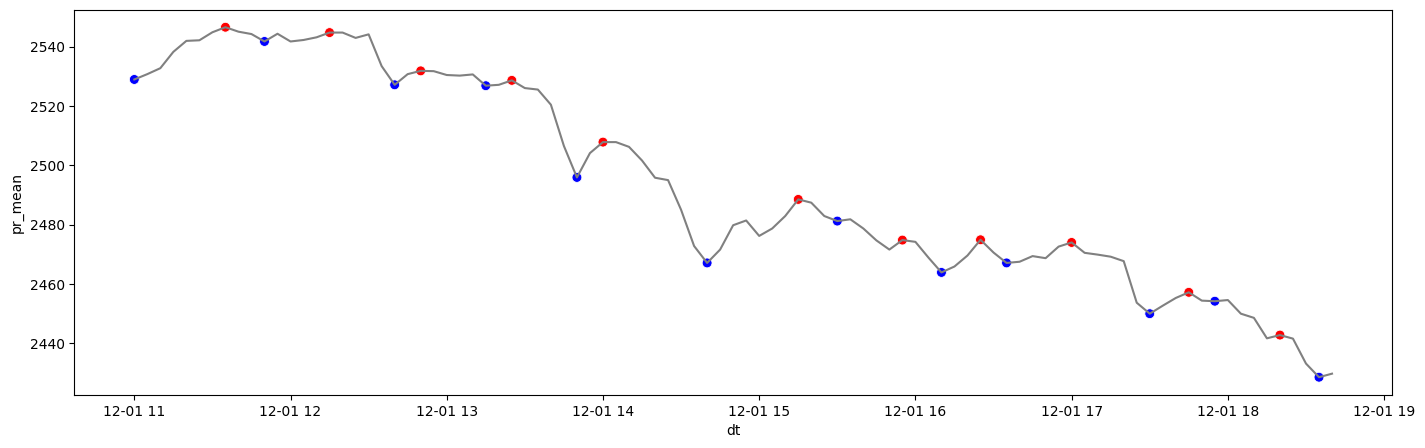

In [269]:
temp = df[['tradedate','tradetime','target','pr_mean']][-93:]
temp['dt'] = temp[['tradedate','tradetime']].astype(str).apply(
    lambda row: row['tradedate'] + ' ' + row['tradetime'], axis=1)
temp['dt'] = pd.to_datetime(temp['dt'])

plt.figure(figsize=(17,5))
sns.lineplot(x=temp['dt'], y=temp['pr_mean'], c='grey')
colors = temp.query('target > 0')['target'].map({1:'red',2:'blue'}).to_list()
sns.scatterplot(x=temp.query('target > 0')['dt'], y=temp.query('target > 0')['pr_mean'], c=colors, s=50);

# Обучение

In [270]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from catboost import CatBoostClassifier
from catboost import CatBoost

import warnings
warnings.filterwarnings('ignore')

In [271]:
drop_cols = ['ticker','tradedate','tradetime','systime','pr_mean','peak','trough','target'] 
f_cols = [col for col in df.columns if col not in drop_cols]

train = df[df['tradedate'].astype('str') < '2023-12-01']
test = df[df['tradedate'].astype('str') == '2023-12-01']

X_train, y_train = train[f_cols], train['target']
X_test, y_test = test[f_cols], test['target']

print(X_train.shape, X_test.shape)
print(y_train.mean() * 100, y_test.mean() * 100)

(18691, 42) (93, 42)
37.85779252046439 37.634408602150536


In [276]:
params = {
    'n_estimators ': [100],
    #'learning_rate ': [0.7, 0.5, 0.3, 0.1, 0.05, 0.01],
    'max_depth ': [1,2,3,4,5,6,7,8],
    'subsample ': [0.3],
    'colsample_bytree ': [0.3]
}

clf = lgb.LGBMClassifier(verbosity=-1)
model = GridSearchCV(
    clf,
    params,
    scoring='precision_macro',
    cv=TimeSeriesSplit(n_splits=5))
model.fit(X_train, y_train)

print(model.best_score_)
print(model.best_params_)

0.611078385363279
{'colsample_bytree ': 0.3, 'max_depth ': 1, 'n_estimators ': 100, 'subsample ': 0.3}


In [277]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) # , labels=[1, 2, 3]

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        70
           1       0.50      0.18      0.27        11
           2       0.60      0.25      0.35        12

    accuracy                           0.76        93
   macro avg       0.63      0.46      0.49        93
weighted avg       0.73      0.76      0.72        93



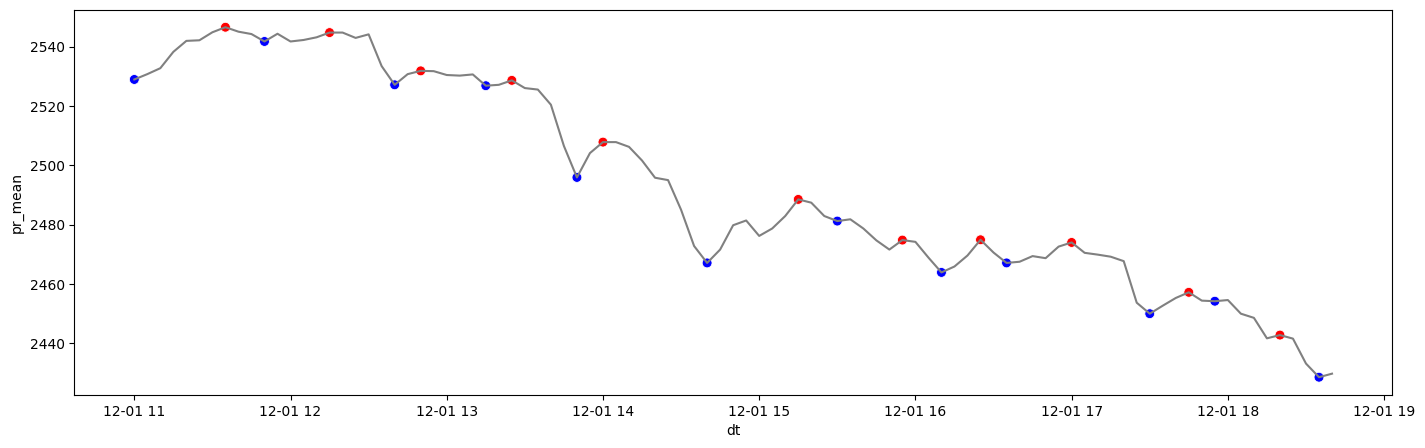

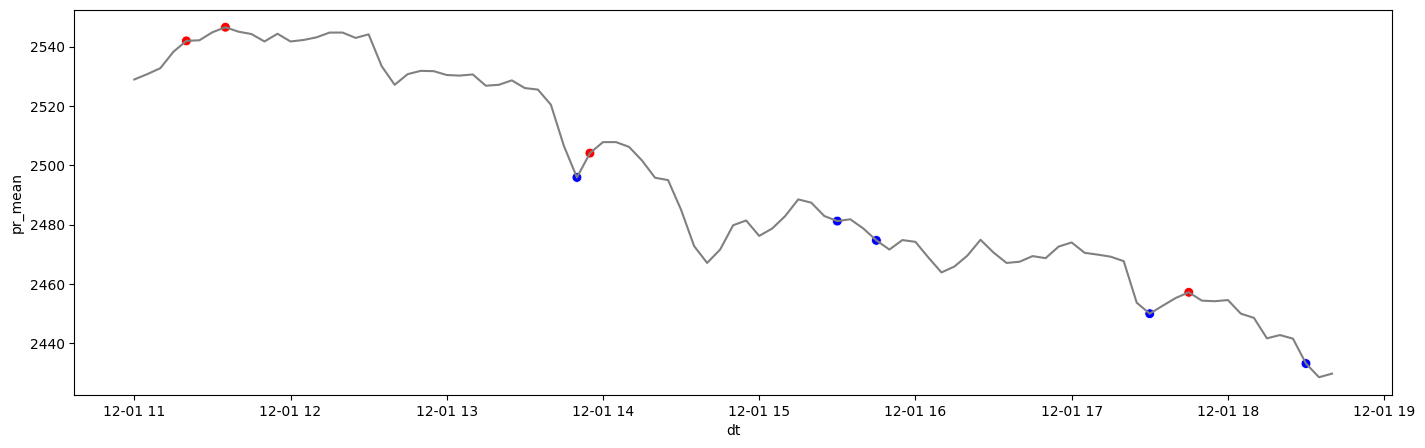

In [279]:
temp = test[['tradedate','tradetime','target','pr_mean']]
temp['pred'] = y_pred
temp['dt'] = temp[['tradedate','tradetime']].astype(str).apply(
    lambda row: row['tradedate'] + ' ' + row['tradetime'], axis=1)
temp['dt'] = pd.to_datetime(temp['dt'])


plt.figure(figsize=(17,5))
sns.lineplot(x=temp['dt'], y=temp['pr_mean'], c='grey')
colors = temp.query('target > 0')['target'].map({1:'red',2:'blue'}).to_list()
sns.scatterplot(x=temp.query('target > 0')['dt'], y=temp.query('target > 0')['pr_mean'], c=colors, s=50);
plt.show()

plt.figure(figsize=(17,5))
sns.lineplot(x=temp['dt'], y=temp['pr_mean'], c='grey')
colors = temp.query('pred > 0')['pred'].map({1:'red',2:'blue'}).to_list()
sns.scatterplot(x=temp.query('pred > 0')['dt'], y=temp.query('pred > 0')['pr_mean'], c=colors, s=50);
plt.show()

## Важность фичей

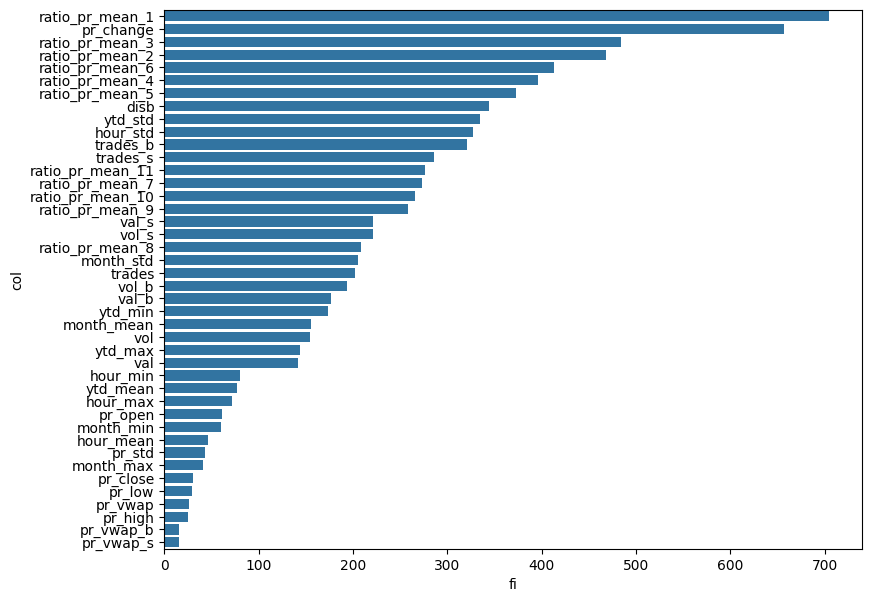

In [278]:
fi_df = pd.DataFrame({
    'col': X_train.columns,
    'fi': model.best_estimator_.feature_importances_
}).sort_values(by='fi', ascending=False)

plt.figure(figsize=(9,7))
sns.barplot(data=fi_df, y='col', x='fi', orient='h');

## Сохранение

In [388]:
model.best_estimator_.booster_.save_model('../models/model.lgb')

In [ ]:
my_model.booster_.save_model('mode.txt')
#load from model:

bst = lgb.Booster(model_file='mode.txt')